# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [53]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Import data
df = pd.read_csv("D:/PROJECTS/Loan Prediction/train.csv")

In [55]:
# import dtale
# dtale.show(df)

# EDA and Preprocessing

steps involved to understand, clean and prepare our data for building model <br />
1. variable identification <br />
2. univariate analysis <br />
3. bi-variate analysis <br />
4. missing values treatment <br />
5. outliers treatment <br />
6. variable transformation <br />
7. variable creation <br />
Finally we iterate steps 4-7 till we get good model.

### Variable Identification

In [56]:
# look the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
#check no. of rows and columns
df.shape

(614, 13)

In [58]:
df.info()

# there is missing data we will handle as go on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
#Count distinct observations without NaN values.
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [60]:
# change the data type of Credit_History column
df['Credit_History'] = df['Credit_History'].astype('O')

In [61]:
#describe the numeric columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [62]:
# describe the chategoric columns
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002300,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


## Univariate Analysis

### Continuous Variables:

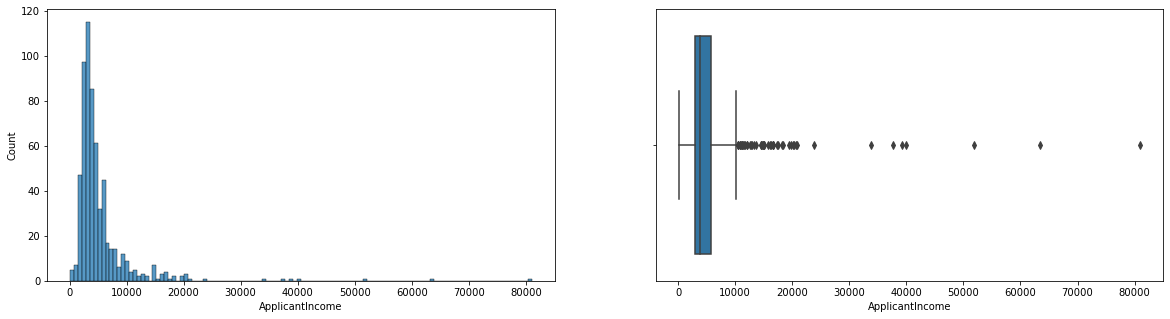

In [64]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(df['ApplicantIncome']);plt.subplot(122);sns.boxplot(df['ApplicantIncome'])
plt.show()

conclusuion:<br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in ApplicantIncome.

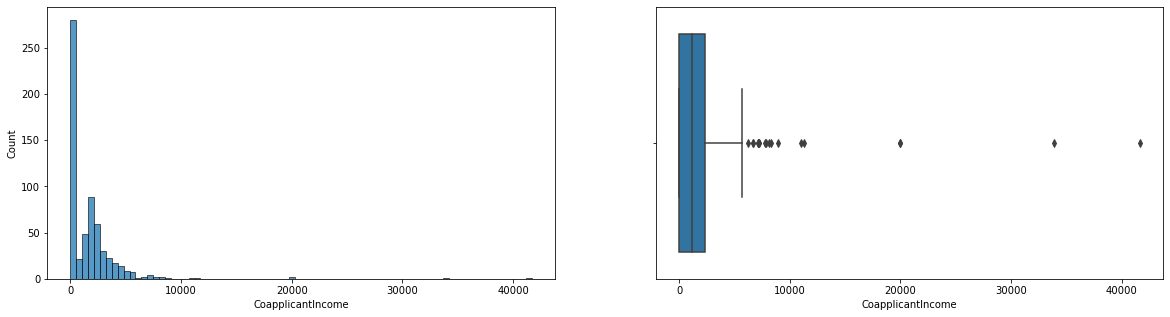

In [65]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(df['CoapplicantIncome']);plt.subplot(122);sns.boxplot(df['CoapplicantIncome'])
plt.show()

conclusuion:<br />
Our data is *Not Normal* (Right Skewed) and There are *Outliers* in CoapplicantIncome.

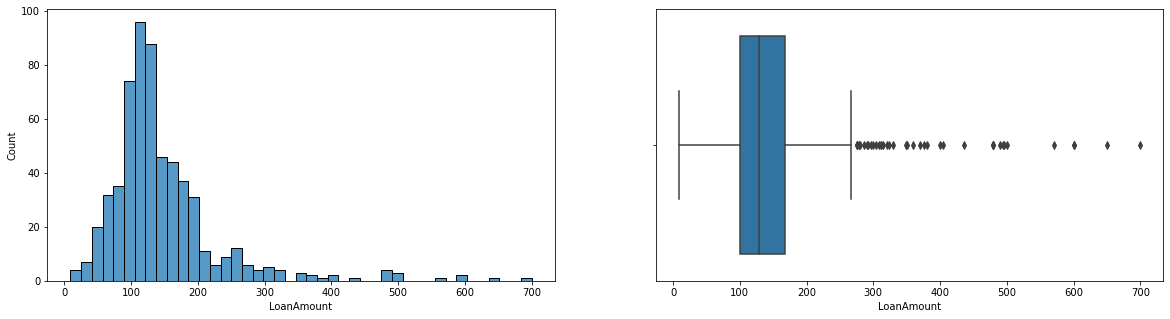

In [66]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(df['LoanAmount']);plt.subplot(122);sns.boxplot(df['LoanAmount'])
plt.show()

conclusuion:<br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in LoanAmount.

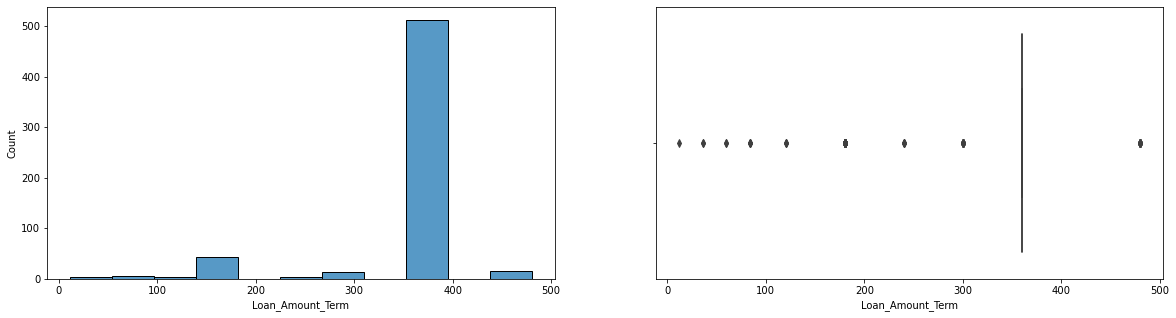

In [67]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(df['Loan_Amount_Term']);plt.subplot(122);sns.boxplot(df['Loan_Amount_Term'])
plt.show()

conclusuion:<br />
Most **Loan_Amount_Term** is 360 only.

### Categorical  Variables:

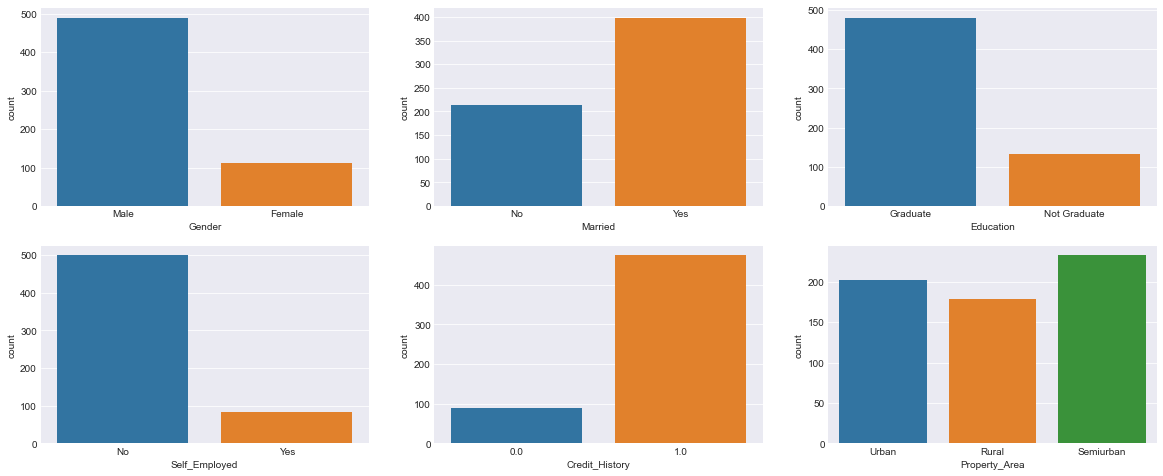

In [134]:
#Visualization on Chategorical columns
plt.figure(figsize=(20,8));plt.style.use('seaborn-darkgrid')
plt.subplot(231);sns.countplot('Gender',data=df);          plt.subplot(232);sns.countplot('Married',data=df)
plt.subplot(233);sns.countplot('Education',data=df);       plt.subplot(234);sns.countplot('Self_Employed',data=df)
plt.subplot(235);sns.countplot('Credit_History',data=df);  plt.subplot(236);sns.countplot('Property_Area',data=df)
plt.show()

conclusuion:<br />
Mostly, those who **Male, Married, Graduated, Not Self_Employed** they applied for Loan.<br />
Those who a high **Credit_History** (1.0) they mostly applied for Loan.<br />
From any **Property_Area** people applied for Loan.

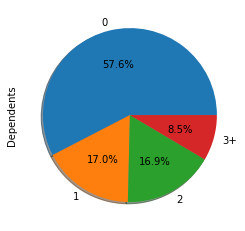

In [69]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True);plt.show()

conclusuion:<br />
Mostly those who **Independent** they applied for Loan

Y    422
N    192
Name: Loan_Status, dtype: int64


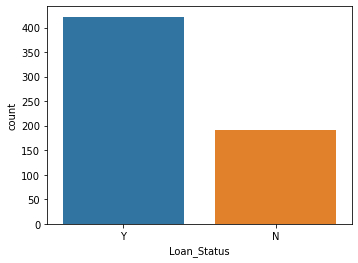

In [70]:
# Targate Vaariable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(df['Loan_Status'])#check our data is balanced or not
print(df['Loan_Status'].value_counts())

From above, data is imbalanced we need to balance it.

## Bi-variate Analysis

In [71]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y


In [86]:
# First we split numeric and chategoric columns seperately
cat_data = []
num_data = []
for col,types in enumerate(df.dtypes):
    if types=='object':
        cat_data.append(df.iloc[:,col])
    else:
        num_data.append(df.iloc[:,col])

In [94]:
cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

### Continuous & Continuous :

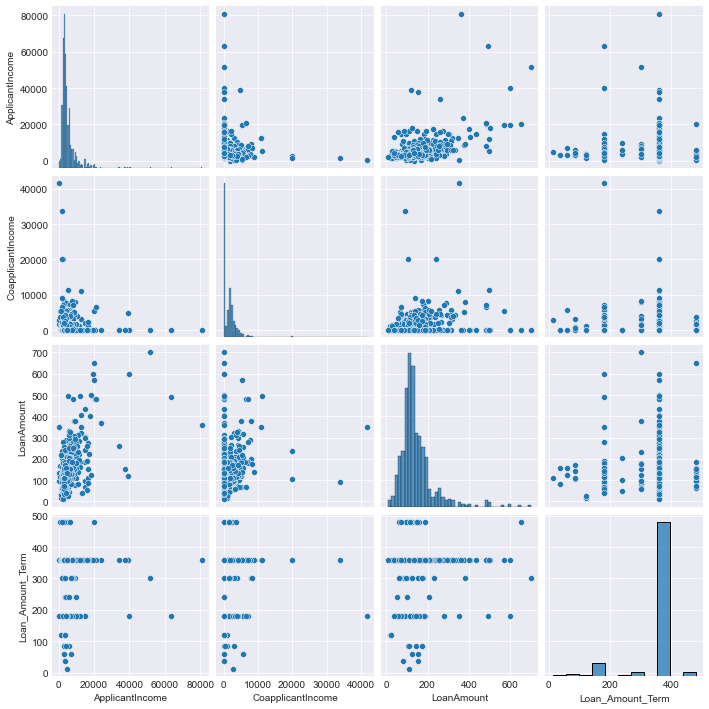

In [135]:
sns.pairplot(num_data);plt.show();plt.style.use('seaborn-darkgrid')

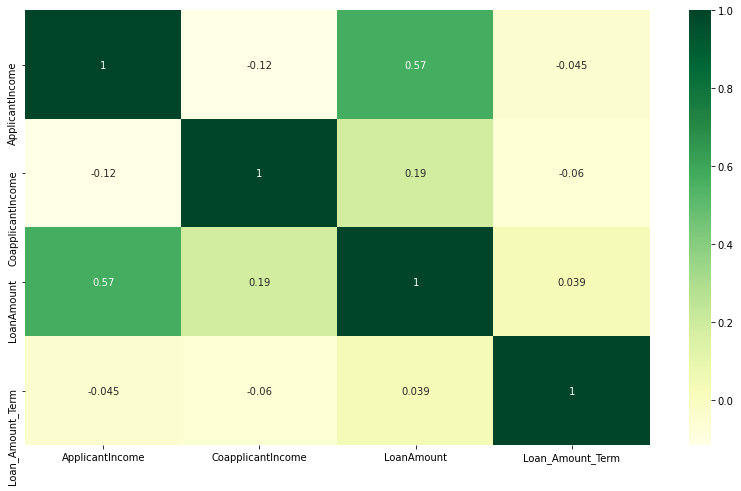

In [118]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap="YlGn");plt.show()

### Categorical & Categorical :

#### Two-way table

In [97]:
Education_tab=pd.crosstab(df.Education,df.Gender)
Education_tab  # we can see how many males and females are graduated or not.

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


#### Stacked Column Chart :

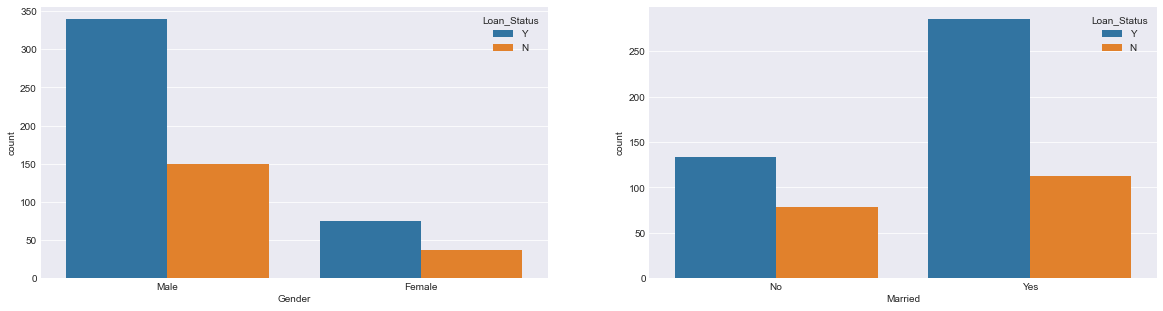

In [133]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,5));plt.subplot(121);sns.countplot('Gender', hue='Loan_Status',data=df,)
plt.subplot(122);sns.countplot('Married', hue='Loan_Status',data=df);plt.show()

conclusion:<br />
most male got Loan and most people who get married they also got Loan

#### Chi-Square Test:

### Categorical & Continuous :

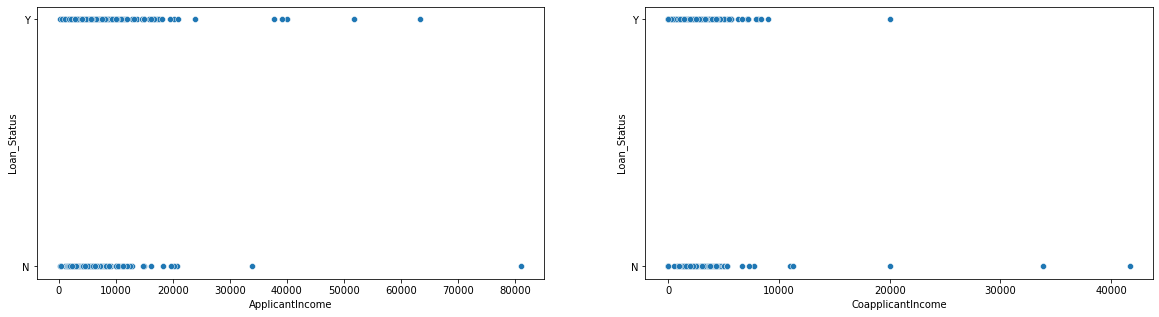

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(121);sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df);
plt.subplot(122);sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df);

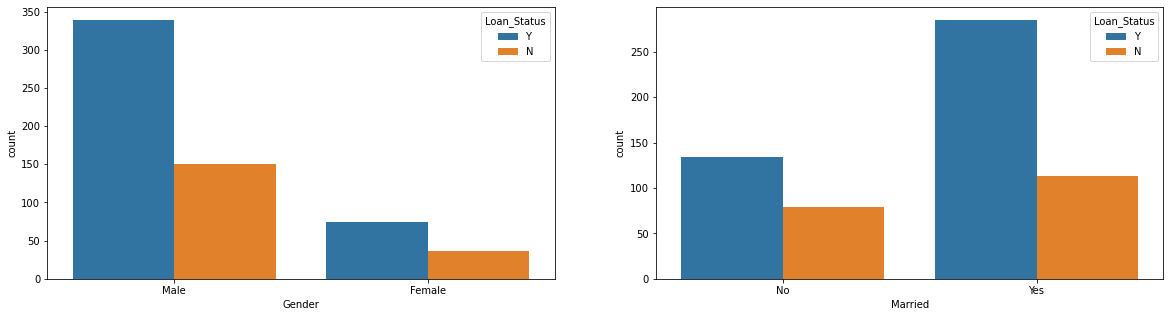

In [42]:
plt.figure(figsize=(20,5));plt.subplot(121);sns.countplot('Gender', hue='Loan_Status',data=df)
plt.subplot(122);sns.countplot('Married', hue='Loan_Status',data=df);plt.show()

conclusion:<br />
most male got Loan and most people who get married they also got Loan

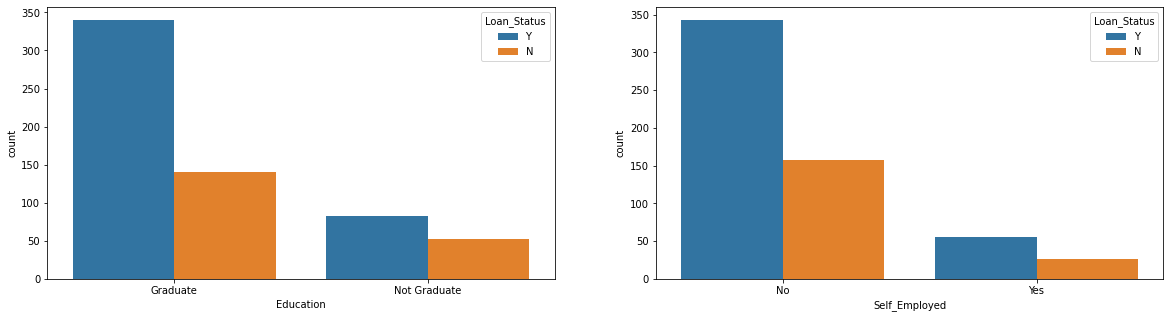

In [77]:
plt.figure(figsize=(20,5));plt.subplot(121);sns.countplot('Education', hue='Loan_Status',data=df)
plt.subplot(122);sns.countplot('Self_Employed', hue='Loan_Status',data=df);plt.show()

conclusion:<br />
most people Graduated and got Loan and also more people not Graduated they also got Loan but with less percentage.<br />
same for Self_Employed.

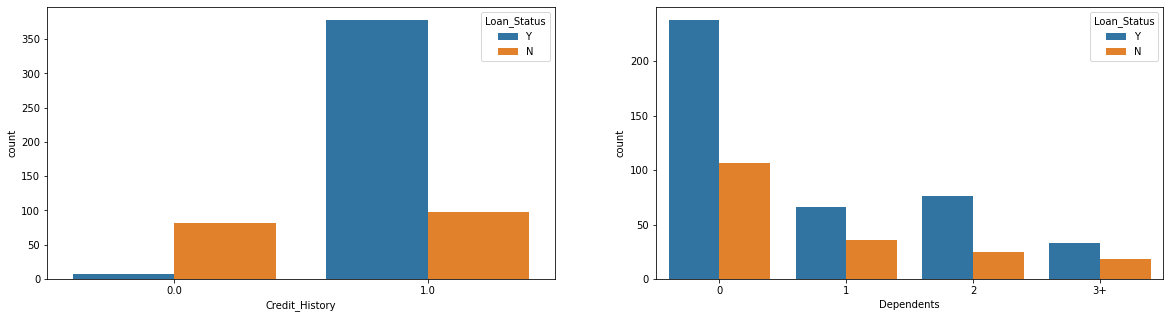

In [43]:
plt.figure(figsize=(20,5));plt.subplot(121);sns.countplot('Credit_History', hue='Loan_Status',data=df)
plt.subplot(122);sns.countplot('Dependents', hue='Loan_Status',data=df);plt.show()

conclusion:<br />
Those who have Credit_History = 1, They have higher chance to get Loan.<br />
And similarly those who have Dependents = 0, They have very high chance to get Loan.

In [ ]:
sns.catplot(x="Gender",kind="count",data=loan,hue="Education",col="Married");plt.show()

conclusion:<br />
More number of married male are interested for loan and more number of unmarried women are interested for loan.

## Preprocessing

In [45]:
# drop 'loan ID' column because not usefull
df.drop('Loan_ID', axis=1, inplace=True)

In [46]:
# ckeck duplicate entries
df.duplicated().any()

False

#### Missing values

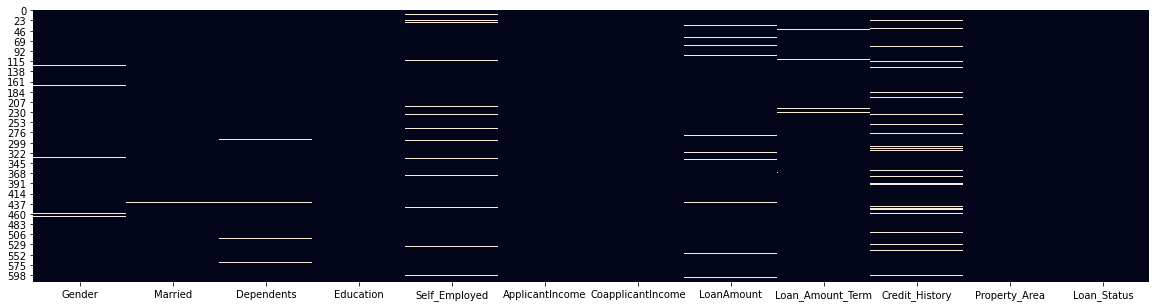

In [70]:
# visualize using Heat map
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False);plt.show()

In [71]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64